In [1]:
import pandas as pd
import numpy as np 
import re
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
import string #for string.punctuation


In [2]:
y = pd.read_csv("TamimiMarketProduct.csv", encoding='UTF-8')
y.head()
df= pd.DataFrame(y)

In [3]:
i=0

#-------name-----
for row in df['Name']:
    d= df['Name'][i].replace(df['Name'][i][0:2], "")
    df.loc[i, 'Name']=d
    length=len(df['Name'][i])
    if '-' in df['Name'][i] :
        postion= df['Name'][i].find('-')
        d= df['Name'][i].replace(df['Name'][i][postion:length], "")
        df.loc[i, 'Name']=d  
    if '\'' in df['Name'][i] :
        postion= df['Name'][i].find('\'')
        d= df['Name'][i].replace(df['Name'][i][postion:length], "")
        df.loc[i, 'Name']=d
        
#-------Clean price----- 
    try:
        if type(df["Price"][i]) != float :
            price=[float(s) for s in re.findall(r'-?\d+\.?\d*', df["Price"][i])]    
            pd.to_numeric(price[0])
            df.loc[i,"Price"]=price[0]
        else:
            df.loc[i,"Price"]=0.0
    except IndexError:
        print(i)  
        
#-------Clean Brand-----
    d= df['Brand'][i].replace(df['Brand'][i][0:2], "")
    df.loc[i, 'Brand']=d
    length=len(df['Brand'][i])
    if '\'' in df['Brand'][i] :
        postion= df['Brand'][i].find('\'')
        d= df['Brand'][i].replace(df['Brand'][i][postion:length], "")
        df.loc[i, 'Brand']=d
        
#-------Clean Offer-----
    d= df['Offer'][i].replace(df['Offer'][i][0:2], "")
    df.loc[i, 'Offer']=d
    length=len(df['Offer'][i])
    if '\'' in df['Offer'][i] :
        postion= df['Offer'][i].find('\'')
        d= df['Offer'][i].replace(df['Offer'][i][postion:length], "")
        df.loc[i, 'Offer']=d
    try:
        price=[float(s) for s in re.findall(r'-?\d+\.?\d*', df["Offer"][i])]
        pd.to_numeric(price[0])
        df.loc[i,"Offer"]=float(price[0])
    except IndexError:
        df.loc[i,"Offer"]=0.0
        
        
    i=i+1
    if(i==21198 ):
        break
    
df

5850


,Category,Name,Price,Brand,Offer
0,breakfast,Chunky Peanut Butter,9.95,Goody,14.95
1,breakfast,Corn Flakes,9.5,Kellogg,15.95
2,breakfast,Creamy Peanut Butter,9.95,Goody,14.95
3,breakfast,The Original Corn Flakes,9.7,Kellogg,0
4,breakfast,Special K Original Wheat Cereal,22.55,Kellogg,0
...,...,...,...,...,...
21193,pets,Food Chicken And Tuna,18.65,Cutey,0
21194,pets,Litter Lemon Scented,19.7,Cutey,0
21195,pets,Hairball control,42.95,Meow Mix,0
21196,pets,Aquadine Anti,16.55,Aquadine,0


In [4]:
df.to_csv('Clean_TamimiMarketProduct')  

In [5]:
data = pd.read_csv("Clean_TamimiMarketProduct.csv", encoding='UTF-8',index_col=0)
data

,Category,Name,Price,Brand,Offer,Deferent
0,breakfast,Chunky Peanut Butter,9.95,Goody,14.95,5.00
1,breakfast,Corn Flakes,9.50,Kellogg,15.95,6.45
2,breakfast,Creamy Peanut Butter,9.95,Goody,14.95,5.00
3,breakfast,The Original Corn Flakes,9.70,Kellogg,0.00,0.00
4,breakfast,Special K Original Wheat Cereal,22.55,Kellogg,0.00,0.00
...,...,...,...,...,...,...
21193,pets,Food Chicken And Tuna,18.65,Cutey,0.00,0.00
21194,pets,Litter Lemon Scented,19.70,Cutey,0.00,0.00
21195,pets,Hairball control,42.95,Meow Mix,0.00,0.00
21196,pets,Aquadine Anti,16.55,Aquadine,0.00,0.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21197 entries, 0 to 21197
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  21197 non-null  object 
 1   Name      21197 non-null  object 
 2   Price     21197 non-null  float64
 3   Brand     21197 non-null  object 
 4   Offer     21197 non-null  float64
 5   Deferent  21197 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


In [7]:
# convert price from object to float 
data["Price"] = pd.to_numeric(data["Price"],errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21197 entries, 0 to 21197
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  21197 non-null  object 
 1   Name      21197 non-null  object 
 2   Price     21197 non-null  float64
 3   Brand     21197 non-null  object 
 4   Offer     21197 non-null  float64
 5   Deferent  21197 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


In [8]:
data.describe()

,Price,Offer,Deferent
count,21197.000000,21197.000000,21197.000000
mean,14.505811,2.827046,0.793208
std,15.330694,9.238901,2.726953
min,0.250000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,10.750000,0.000000,0.000000
75%,18.850000,0.000000,0.000000
max,377.700000,269.850000,87.950000


In [9]:
# To show the missing values
print(" Count total missing values at each column in a DataFrame : \n\n", 
      data.isnull().sum())

 Count total missing values at each column in a DataFrame : 

 Category    0
Name        0
Price       0
Brand       0
Offer       0
Deferent    0
dtype: int64


In [10]:
null_data = data[data.isnull().any(axis=1)]

In [11]:
null_data

,Category,Name,Price,Brand,Offer,Deferent


In [12]:
#We will unify the Missing Value of the brand to unknown
data['Brand'].fillna('Unknown', inplace=True)

In [13]:
# delete 1 row with null price 
data = data.dropna(how='any',axis=0) 

In [14]:
print(" Count total missing values at each column in a DataFrame : \n\n", 
      data.isnull().sum())

 Count total missing values at each column in a DataFrame : 

 Category    0
Name        0
Price       0
Brand       0
Offer       0
Deferent    0
dtype: int64


#### add new feature "Deferent" have the original price "offer" then the price after offering "price" and how many money will customer save

In [15]:
diff = data['Offer'] - data['Price']


In [16]:
data['Deferent']= diff
for ind in data.index: 
    if data['Deferent'][ind]<0:
        data['Deferent'][ind]=0.0 
data

C:\Users\shrougalbahoth\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Category,Name,Price,Brand,Offer,Deferent
0,breakfast,Chunky Peanut Butter,9.95,Goody,14.95,5.00
1,breakfast,Corn Flakes,9.50,Kellogg,15.95,6.45
2,breakfast,Creamy Peanut Butter,9.95,Goody,14.95,5.00
3,breakfast,The Original Corn Flakes,9.70,Kellogg,0.00,0.00
4,breakfast,Special K Original Wheat Cereal,22.55,Kellogg,0.00,0.00
...,...,...,...,...,...,...
21193,pets,Food Chicken And Tuna,18.65,Cutey,0.00,0.00
21194,pets,Litter Lemon Scented,19.70,Cutey,0.00,0.00
21195,pets,Hairball control,42.95,Meow Mix,0.00,0.00
21196,pets,Aquadine Anti,16.55,Aquadine,0.00,0.00


In [17]:
data.to_csv('Clean_TamimiMarketProduct')  

# visualize the data 

#### first count values in each column except name

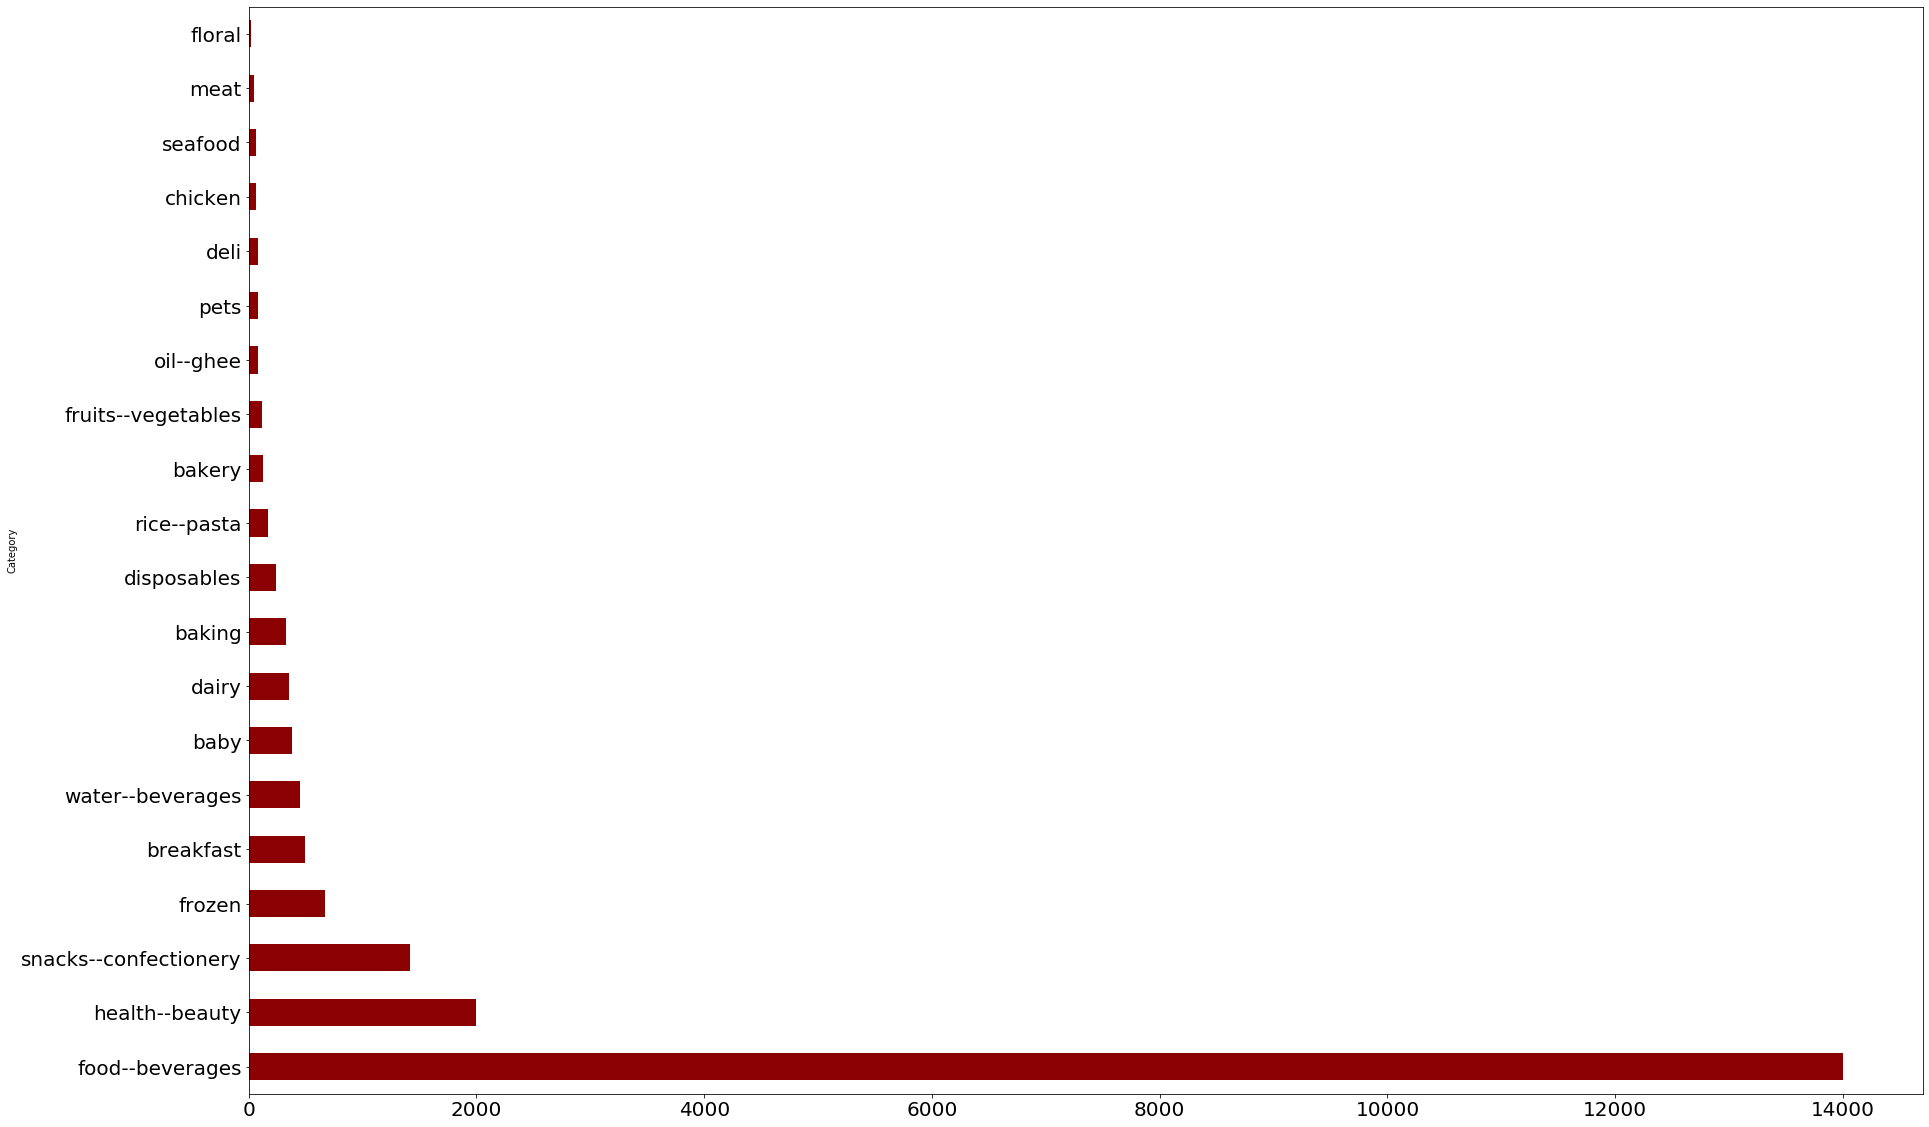

In [15]:
data['Category'].value_counts().plot(kind='barh', figsize=(30,20),color='darkred'
                                     ,fontsize=20,xlabel='Category',ylabel='Item count')


### about 14000 items are food beverages, and other categories have less than 2000 items, 
## so food beverages is the most frequent category with about 14000
## Then we have health beauty as the second frequent category with about 2000

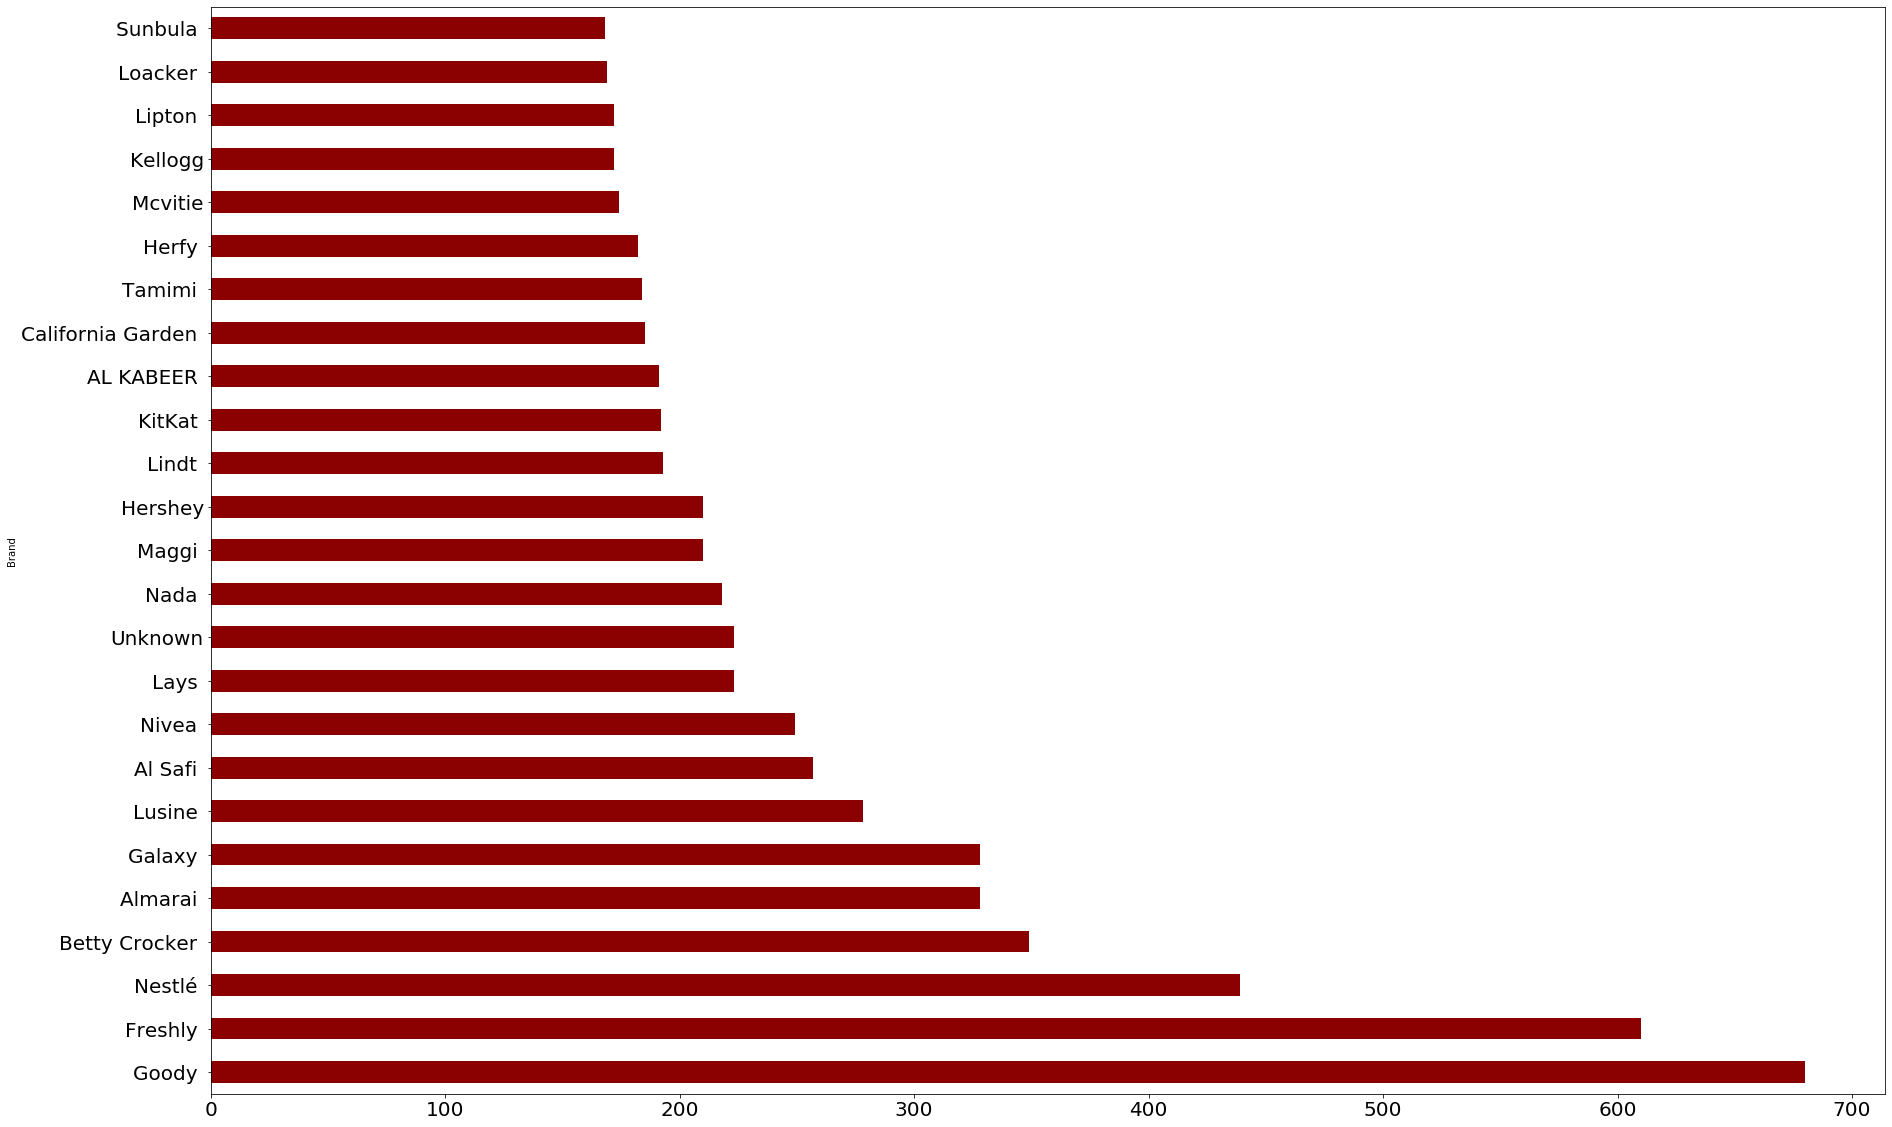

In [16]:
data['Brand'].value_counts().head(25).plot(kind='barh', figsize=(30,20),color='darkred',fontsize=20,xlabel='Brand',ylabel='Frequency')

## Goody brand is the most frequent brand with about 680 items
## Then we have Freshly as the second frequent brand with about 610 items
## Then Nestlé as the thrid frequent brand with about 610 items
### all the most frequent brands are food brands

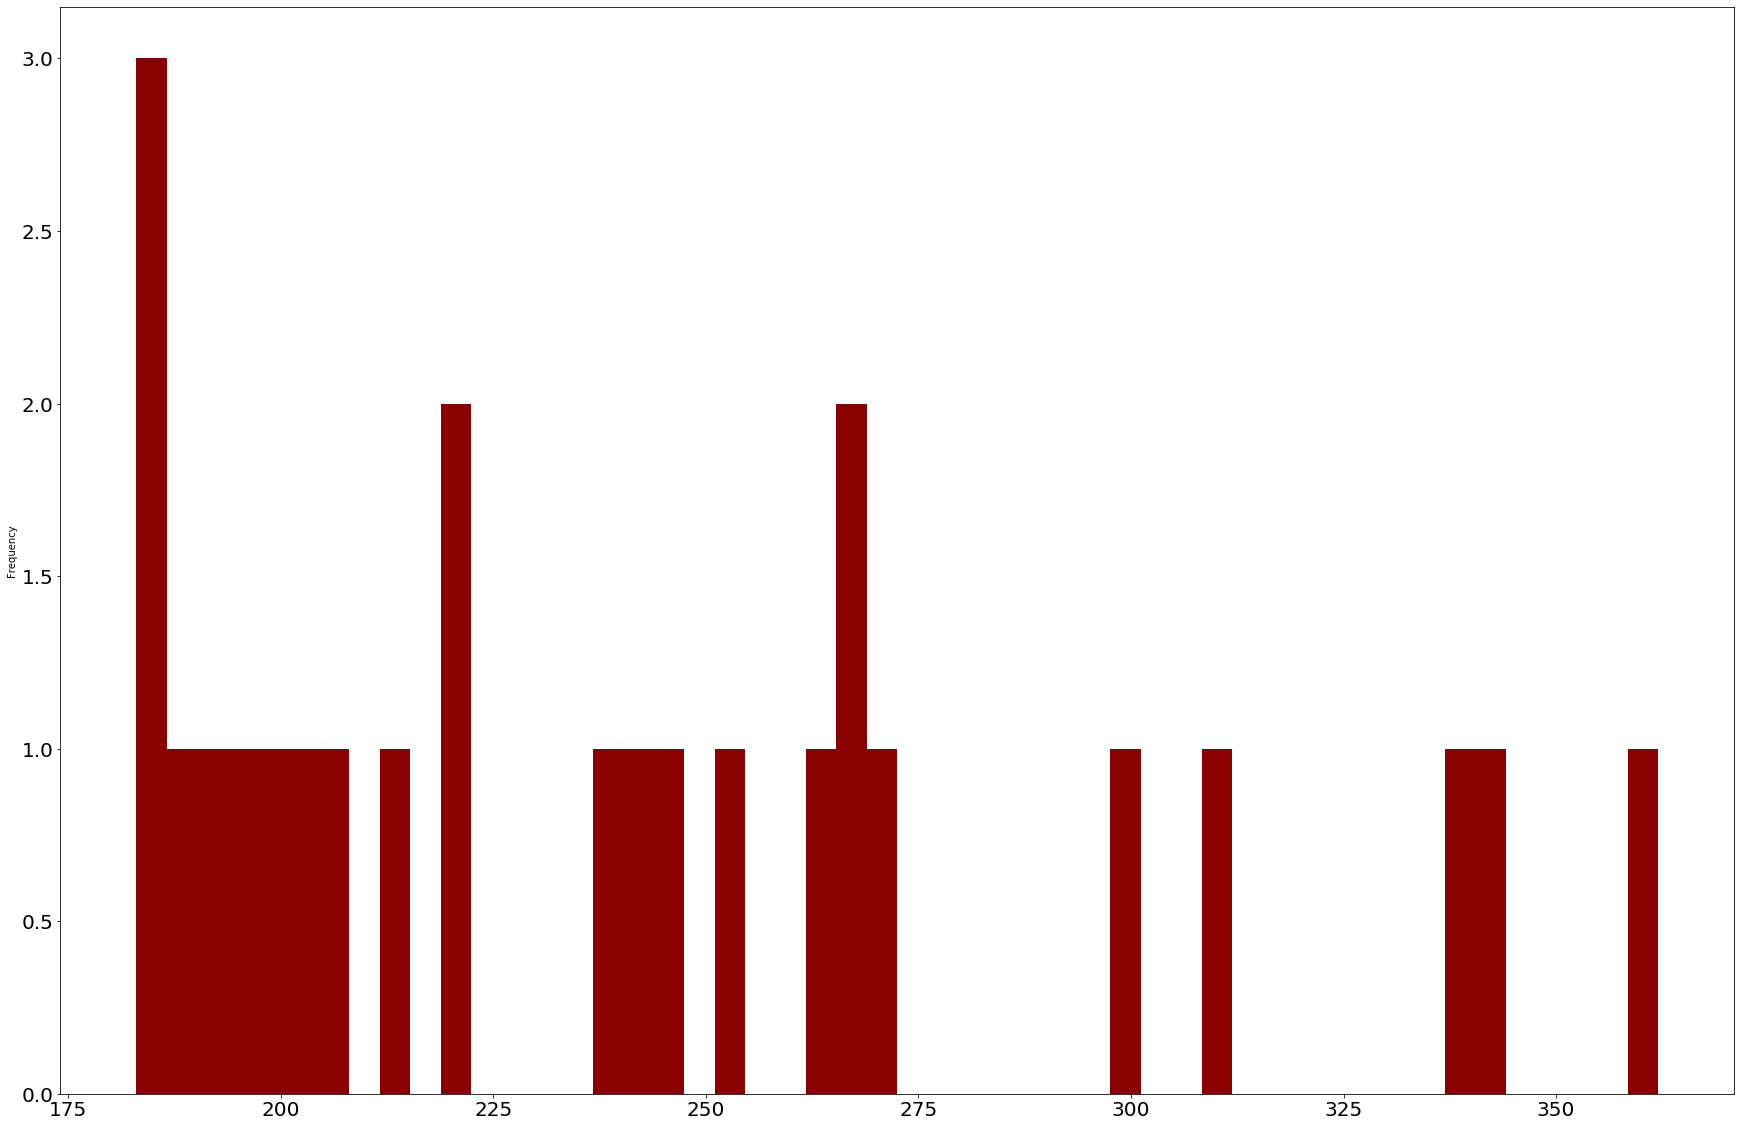

In [17]:
#pd.Series(data['Price']).hist(color='darkred',figsize=(30,20), bins=50);
data['Price'].value_counts().head(25).plot(kind='hist', bins=50, figsize=(30,20),color='darkred',fontsize=20,xlabel='Price',ylabel='Frequency')

## as we see in the above graph the prices between 0.25 and 377
## more than 75% of items are less than 50.00 riyal
## half of items are under 25.00 riyal

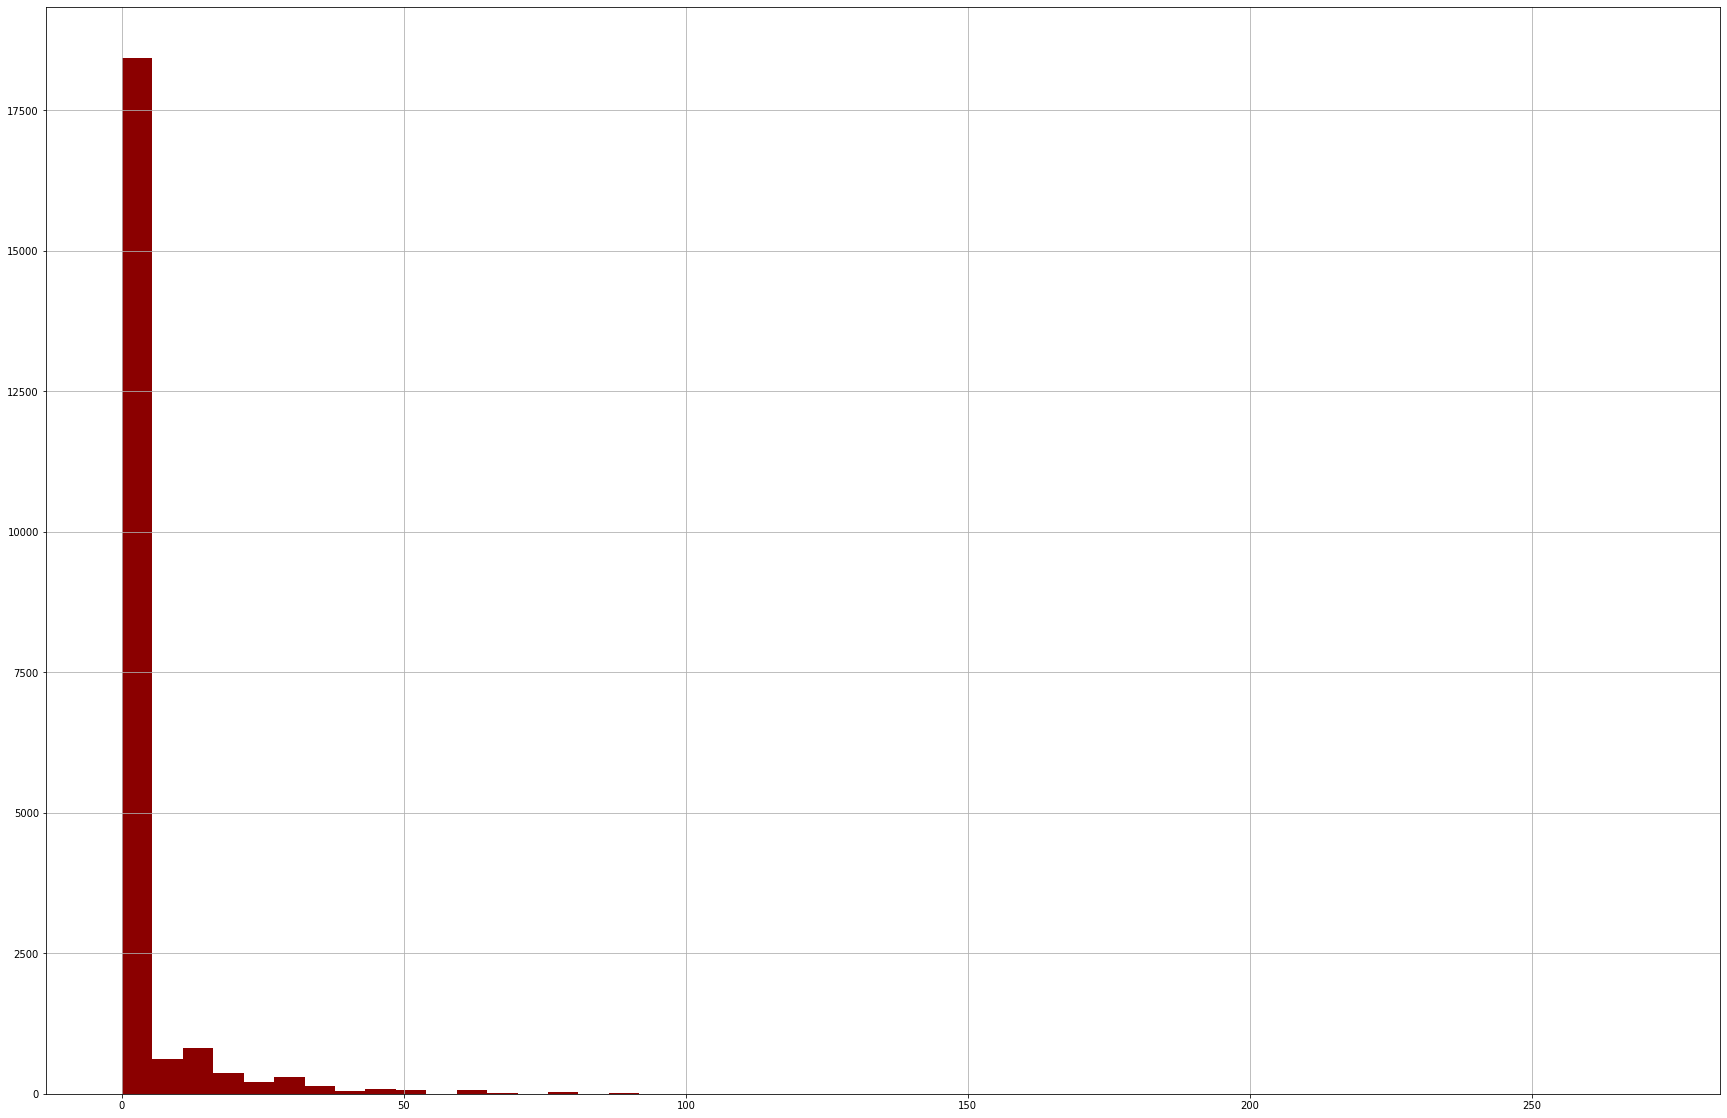

In [18]:
pd.Series(data['Offer']).hist(color='darkred',figsize=(30,20), bins=50);
#data['Offer'].value_counts().plot(kind='hist', bins=50, figsize=(30,20),color='darkred',fontsize=20,xlabel='Offer',ylabel='Frequency')

## only 25% of items have offer
## more than half of the items with an offer has under 50.00 riyal offer

# statistical analysis

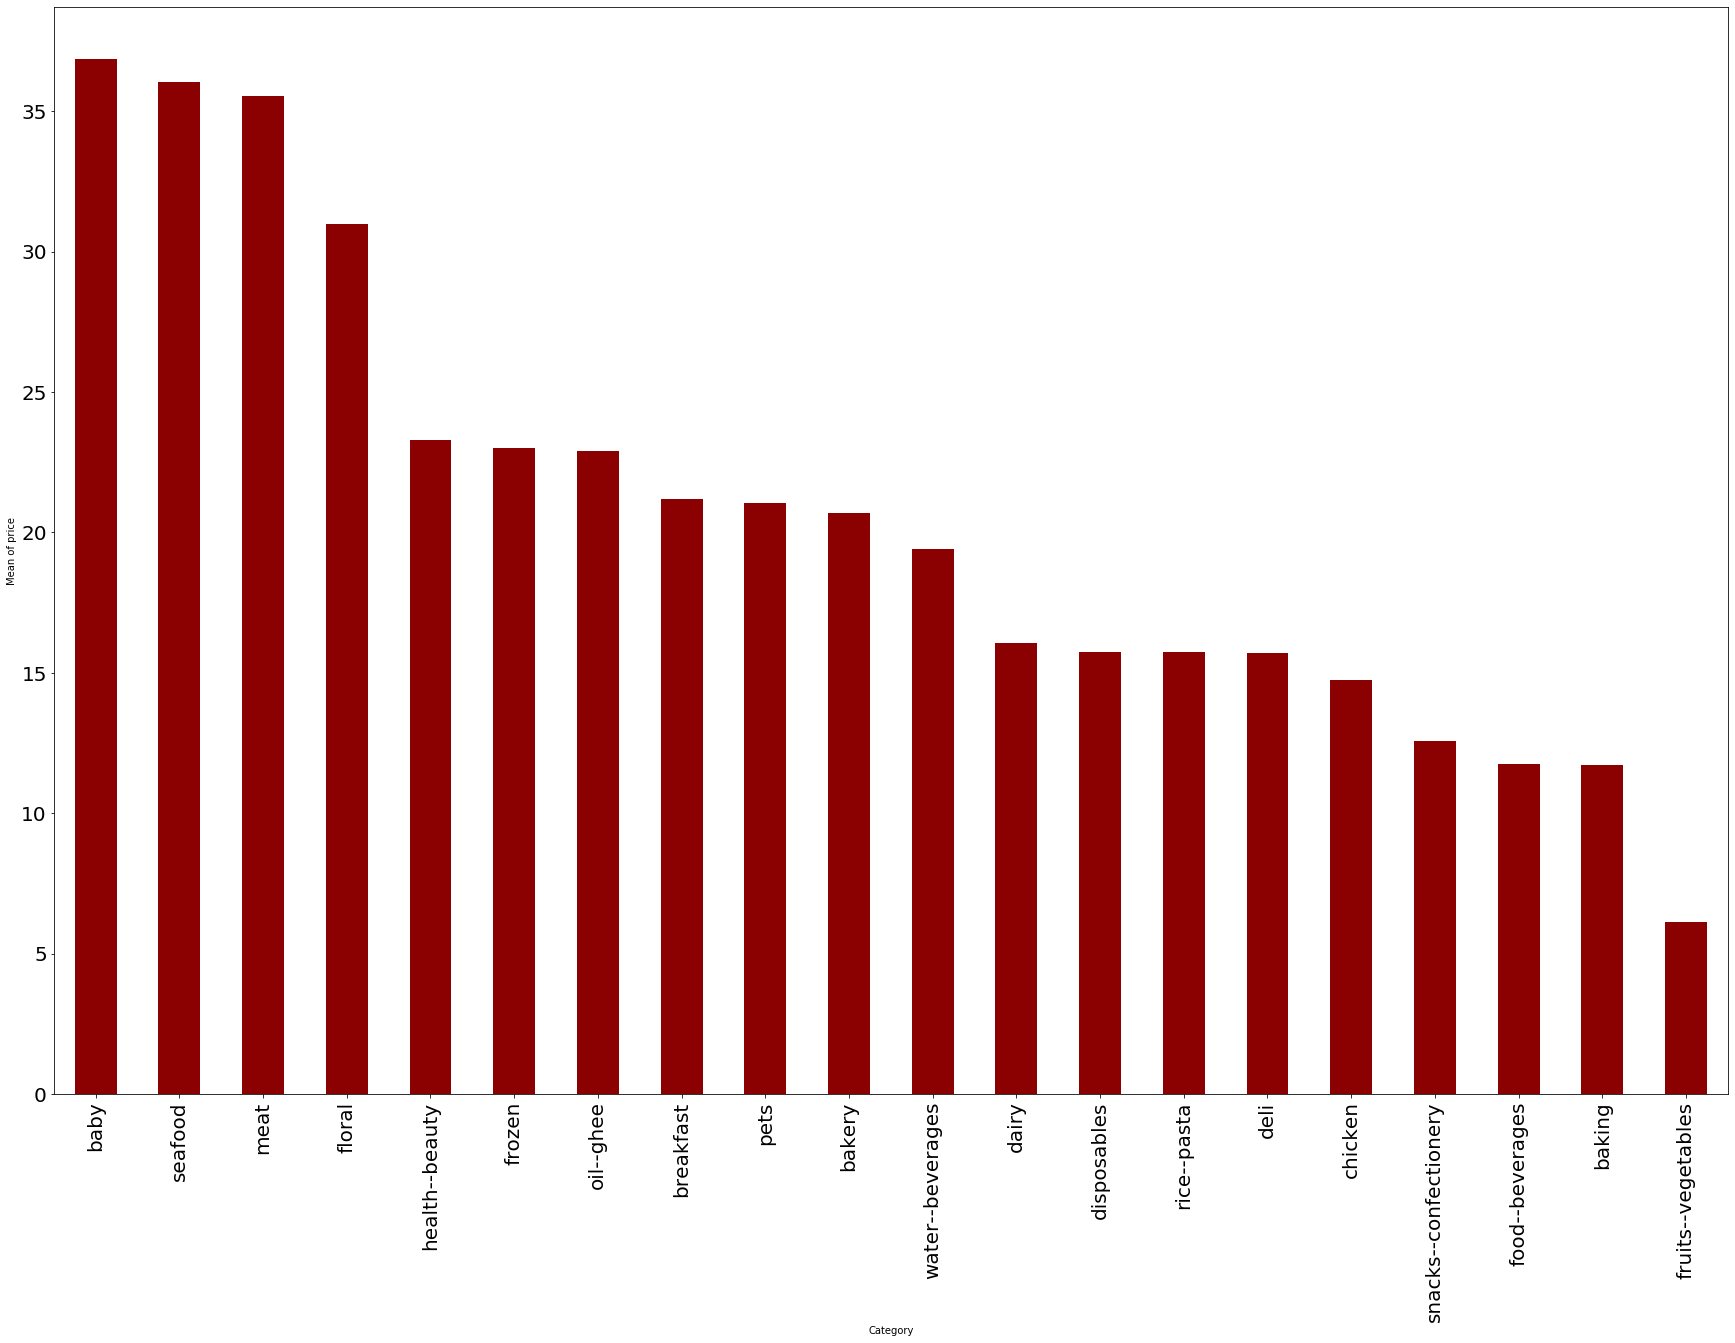

In [19]:
## show the mean price for each Category 
Category_price =data.groupby(data['Category'])['Price'].mean().sort_values(ascending=False)
Category_price.plot(kind='bar', figsize=(30,20),color='darkred',fontsize=20,xlabel='Category',ylabel= 'Mean of price')

#### after calculate the mean price for each category 
### baby category has the most expensive items with about 37 riyal 
### seafood category is the second most expensive items with about 36 riyal 
### meat category is the third most expensive items with about 35 riyal 
### the cheapest category is fruits and Vegetables 
### then baking and food beverages become after fruits and Vegetables in the cheapest category

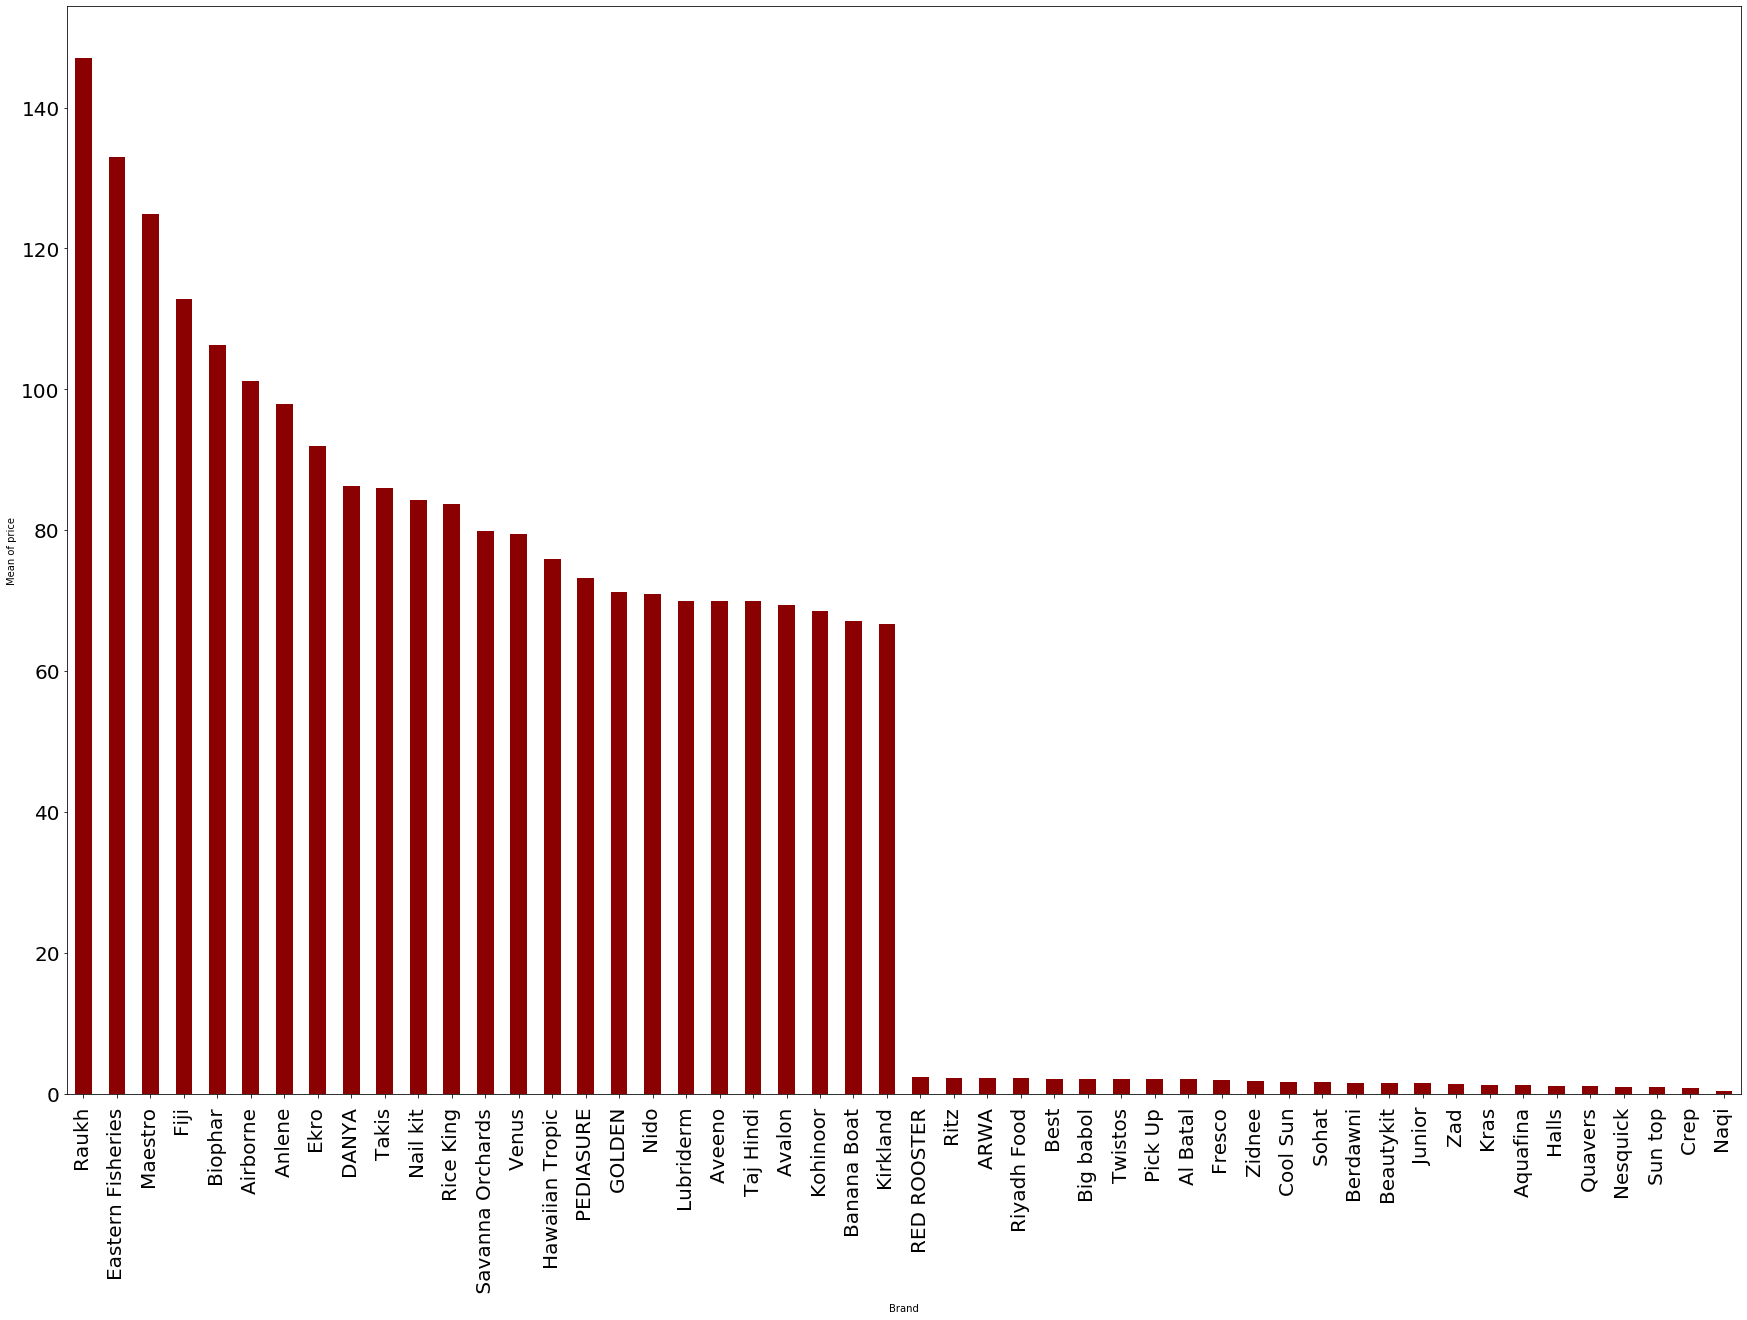

In [20]:
## show the mean price for each Brand with the higher 25 and Lower 25
Brand_price =data.groupby(data['Brand'])['Price'].mean().sort_values(ascending=False)
new_Brand_price = Brand_price.head(25)
new_Brand_price = new_Brand_price.append(Brand_price.tail(25))
new_Brand_price.plot(kind='bar', figsize=(30,20),color='darkred',fontsize=20,xlabel='Brand',ylabel= 'Mean of price')

#### after calculate the mean price for each brand 
### Raukh brand has the most expensive items with about 147 riyal. Raukh is a juice brand
### Eastern Fisheries brand is the second most expensive items with about 132 riyal. Eastern Fisheries is a fish brand
### Maestro brand is the third most expensive items with about 124 riyal. Maestro is olive and oil brand

### The cheapest brands are Naqi & Crep & Sun top with less than 1.00 riyal mean price  
### sun top is a juice brand. Crep is chocolate brand. Naqi is water brand




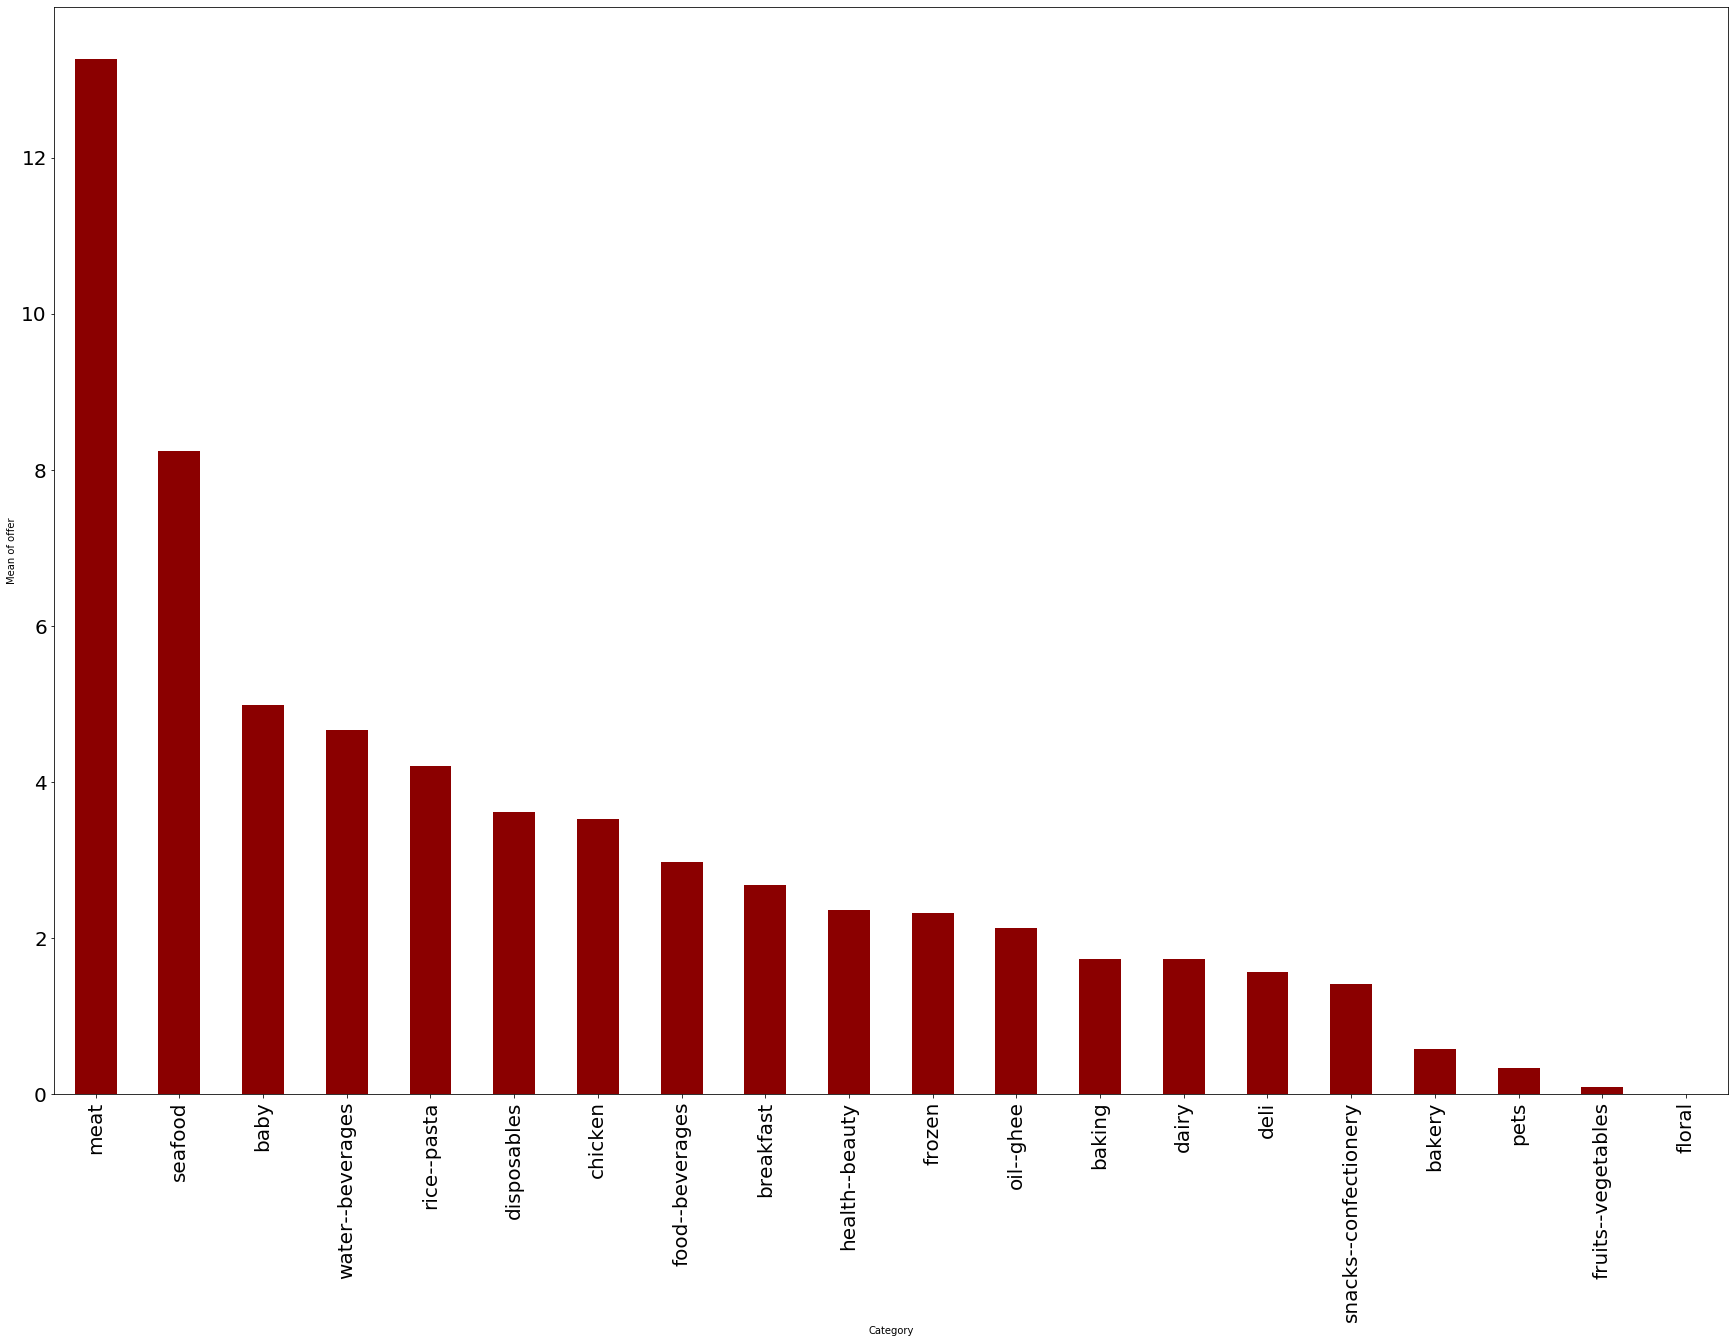

In [21]:
## show each Category with mean offer
Category_Offer =data.groupby(data['Category'])['Offer'].mean().sort_values(ascending=False)
Category_Offer.plot(kind='bar', figsize=(30,20),color='darkred',fontsize=20,xlabel='Category',ylabel= 'Mean of offer')

#### after calculate the mean offer for each category 

### meat category items have the highest mean offer
### floral is the only category with no offers



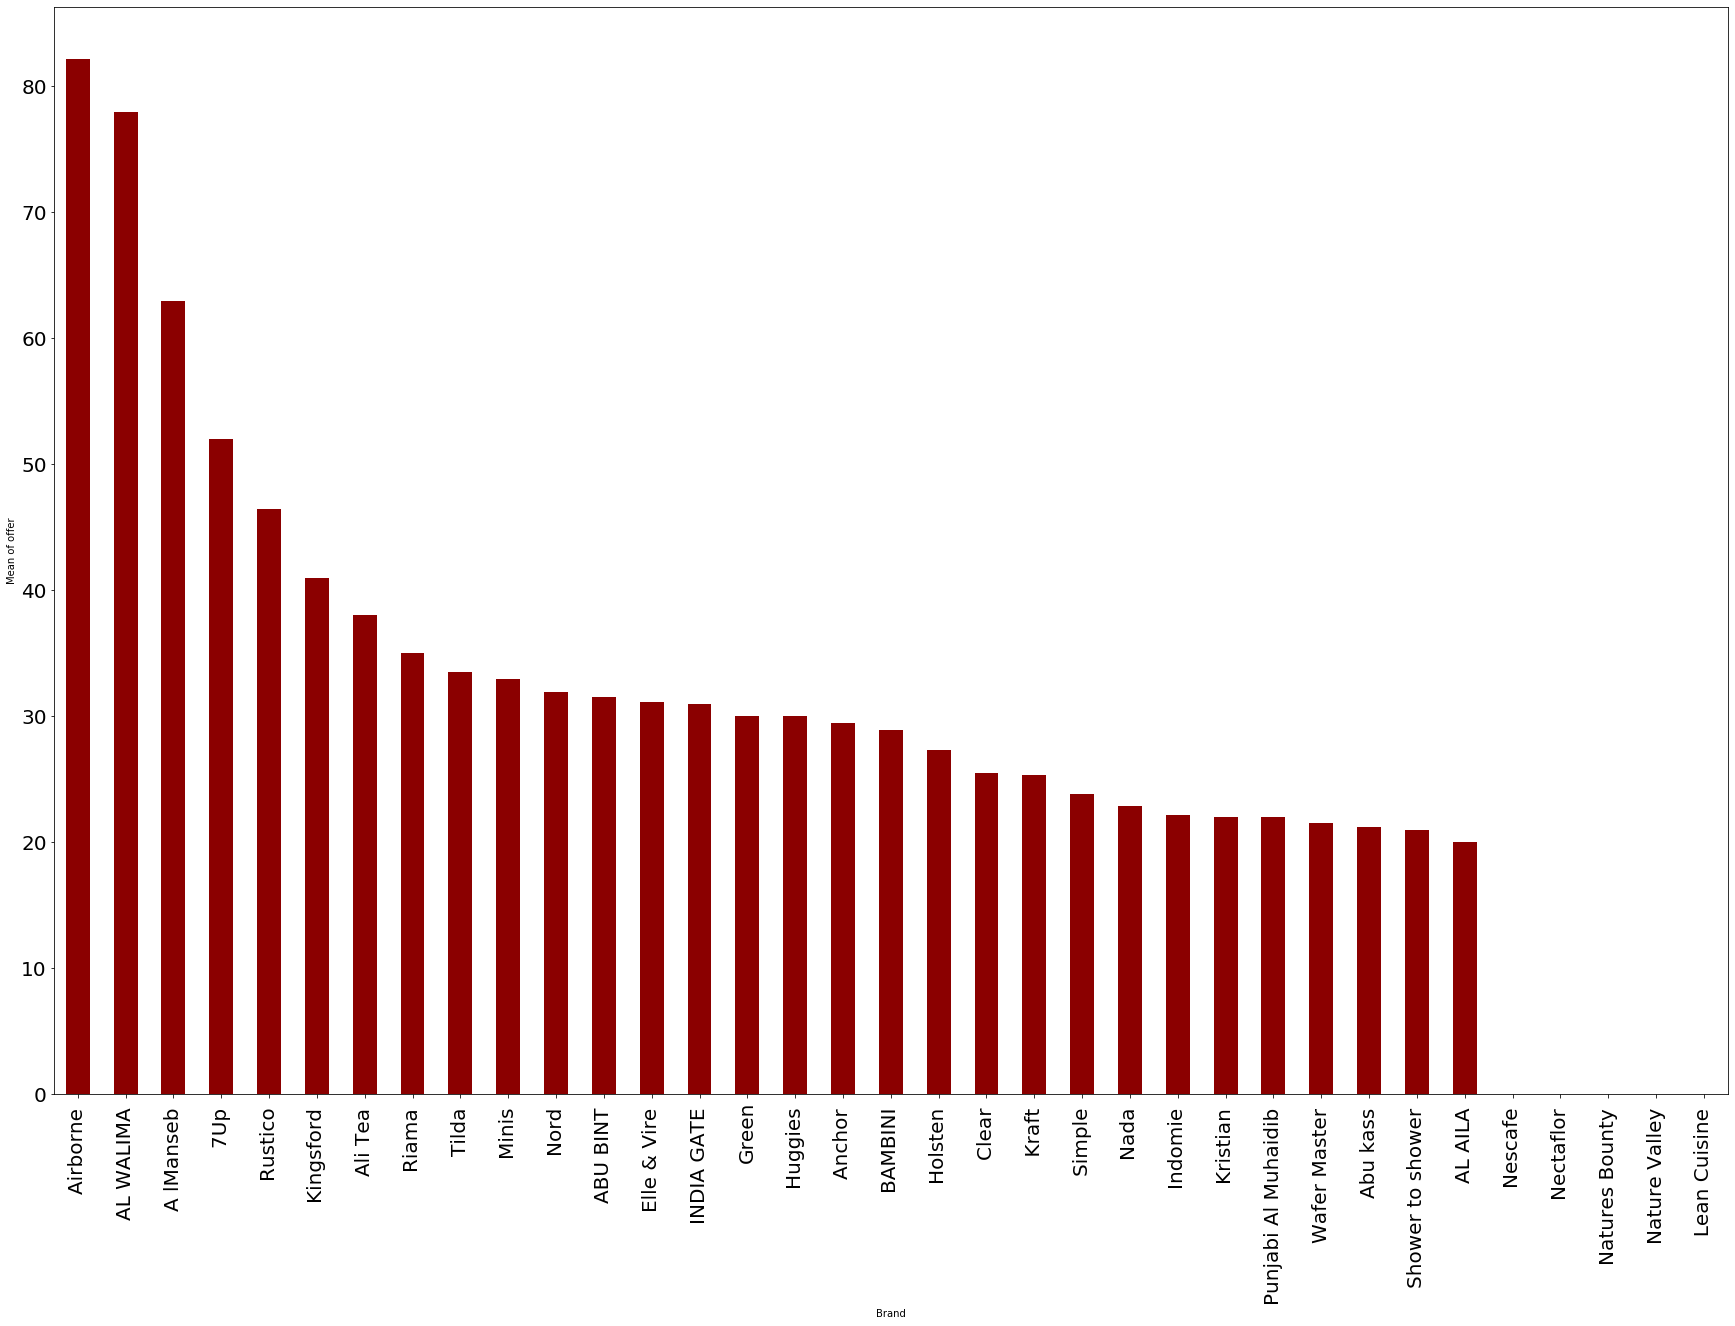

In [22]:
## show each brand with mean offer
Brand_Offer =data.groupby(data['Brand'])['Offer'].mean().sort_values(ascending=False)
new_Brand_Offer = Brand_Offer.head(30)
new_Brand_Offer = new_Brand_Offer.append(Brand_Offer.tail(5))
new_Brand_Offer.plot(kind='bar', figsize=(30,20),color='darkred',xlabel='Brand',ylabel= 'Mean of offer',fontsize=20)



In [23]:
Brand_Offer.describe()

count    992.000000
mean       2.124791
std        7.020196
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       82.155556
Name: Offer, dtype: float64

#### after calculate the mean offer for each brand 

### Airborne brand items have the highest mean offer
### 75% of brands doesn't give offers

In [24]:
Brand_Offer

Brand
Airborne           82.155556
AL WALIMA          77.950000
A lManseb          62.950000
7Up                52.000000
Rustico            46.406250
                     ...    
Nescafe             0.000000
Nectaflor           0.000000
Natures Bounty      0.000000
Nature Valley       0.000000
  Lean Cuisine      0.000000
Name: Offer, Length: 992, dtype: float64

In [18]:
df3 = data[data['Category'] == 'baby']
df3

,Category,Name,Price,Brand,Offer,Deferent
20730,baby,Baby Shampoo,17.50,Johnson,0.0,0.0
20731,baby,Cerelac Infant Cereal Wheat,24.10,Nestlé,0.0,0.0
20732,baby,Cerelac Infant Cereal Wheat & Honey,24.10,Nestlé,0.0,0.0
20733,baby,Cerelac Infant Cereal Wheat & Dates,24.10,Nestlé,0.0,0.0
20734,baby,Gentle All Over Baby Wipes,54.60,Johnson,0.0,0.0
...,...,...,...,...,...,...
21109,baby,Mineral Water Bottle,4.85,Tania,0.0,0.0
21110,baby,Mineral Water Bottle,17.65,Tania,0.0,0.0
21111,baby,Mineral Water Bottle,16.50,Tania,0.0,0.0
21112,baby,Natural Spring Water,18.95,Tannourine,0.0,0.0


In [19]:

AV=df3['Price'].mean()
print("The average prices of baby products is: ", AV)

The average prices of baby products is:  36.8601562500001


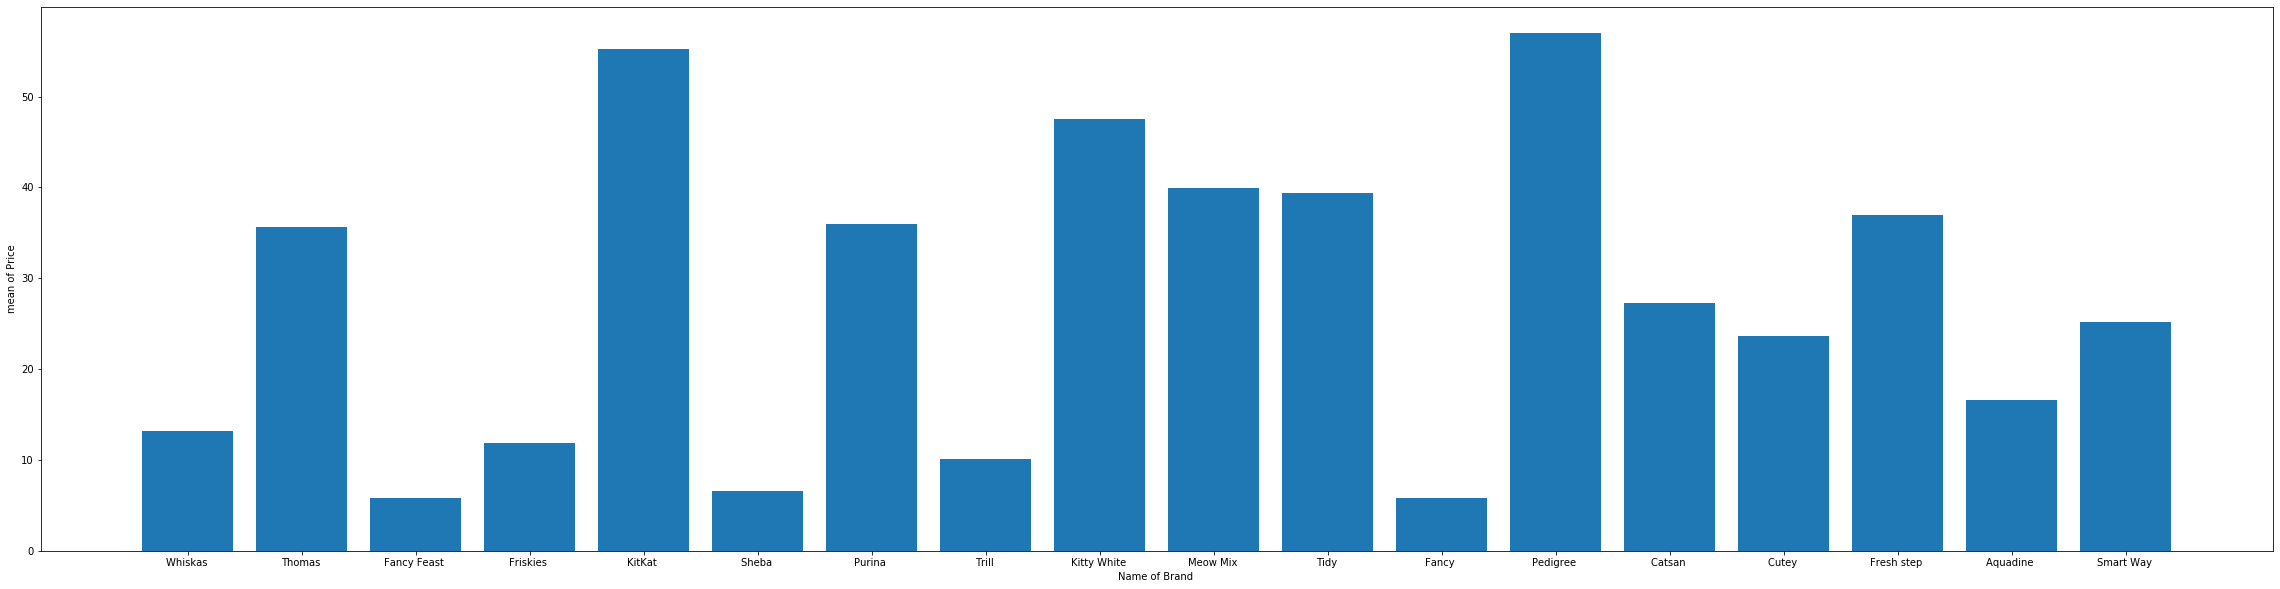

In [20]:
df4 = data[(data['Category'] == 'pets') & (data['Brand'] != '')]

brandList=[]
brandMean={}
for row in df4['Brand']:
    if row in brandList:
        continue 
    brandList.append(row)
      
for x in brandList:
    d = df4[df4['Brand'] == x ]['Price'].mean()
    brandMean[x]=d
brandMean
 
keys =brandMean.keys()
values = brandMean.values()
fig, axs = plt.subplots(1, 1, figsize=(40, 10), sharey=True)
plt.bar(keys, values, )
plt.ylabel ('mean of Price')
plt.xlabel ('Name of Brand ')

plt.show()

#### create new df for offers.
#### this new df have the orfinal price "offer" then the price after offer "price" and how many money will customer save

In [21]:
df_offers= data[data['Offer'] > 0]
df_offers

,Category,Name,Price,Brand,Offer,Deferent
0,breakfast,Chunky Peanut Butter,9.95,Goody,14.95,5.00
1,breakfast,Corn Flakes,9.50,Kellogg,15.95,6.45
2,breakfast,Creamy Peanut Butter,9.95,Goody,14.95,5.00
7,breakfast,Fitness Original Breakfast Cereal,14.50,Nestlé,19.95,5.45
8,breakfast,Fitness Honey & Almond Breakfast Cereal,14.50,Nestlé,21.95,7.45
...,...,...,...,...,...,...
21122,pets,In Jelly With Tuna,2.50,Whiskas,3.30,0.80
21131,pets,Pouch Junior With Tuna,2.50,Whiskas,3.30,0.80
21132,pets,Pouch With Chicken In Sauce,2.50,Whiskas,3.30,0.80
21138,pets,In Gravy With Beef,2.50,Whiskas,3.30,0.80


In [22]:
diff = df_offers['Offer'] - df_offers['Price']

In [23]:
df_offers['Different']= diff
df_offers

C:\Users\shrougalbahoth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Category,Name,Price,Brand,Offer,Deferent,Different
0,breakfast,Chunky Peanut Butter,9.95,Goody,14.95,5.00,5.00
1,breakfast,Corn Flakes,9.50,Kellogg,15.95,6.45,6.45
2,breakfast,Creamy Peanut Butter,9.95,Goody,14.95,5.00,5.00
7,breakfast,Fitness Original Breakfast Cereal,14.50,Nestlé,19.95,5.45,5.45
8,breakfast,Fitness Honey & Almond Breakfast Cereal,14.50,Nestlé,21.95,7.45,7.45
...,...,...,...,...,...,...,...
21122,pets,In Jelly With Tuna,2.50,Whiskas,3.30,0.80,0.80
21131,pets,Pouch Junior With Tuna,2.50,Whiskas,3.30,0.80,0.80
21132,pets,Pouch With Chicken In Sauce,2.50,Whiskas,3.30,0.80,0.80
21138,pets,In Gravy With Beef,2.50,Whiskas,3.30,0.80,0.80


In [24]:
df_offers.sort_values(by=['Different'], inplace=True, ascending=False)
df_offers

C:\Users\shrougalbahoth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Category,Name,Price,Brand,Offer,Deferent,Different
5742,disposables,Clear Drawstring Bag,42.00,Unknown,129.95,87.95,87.95
6220,seafood,Hamour Fillet,218.85,Unknown,269.85,51.00,51.00
842,snacks--confectionery,Miniatures,30.00,Hershey,79.95,49.95,49.95
20790,baby,Huggies Ultra Comfort Diapers Size 5 Jumbo Pac...,45.95,Huggies,89.95,44.00,44.00
20799,baby,Huggies Ultra Comfort Diapers Size 3 Jumbo Pac...,45.95,Huggies,89.95,44.00,44.00
...,...,...,...,...,...,...,...
1250,snacks--confectionery,Salt & Vinegar Chips XXL,11.95,Pringles,12.00,0.05,0.05
1249,snacks--confectionery,Hot Cheesy Chips XXL,11.95,Pringles,12.00,0.05,0.05
1248,snacks--confectionery,Hot Paprika Chips XXL,11.95,Pringles,12.00,0.05,0.05
1386,snacks--confectionery,Chili Chipotle Chips,6.95,Doritos,7.00,0.05,0.05


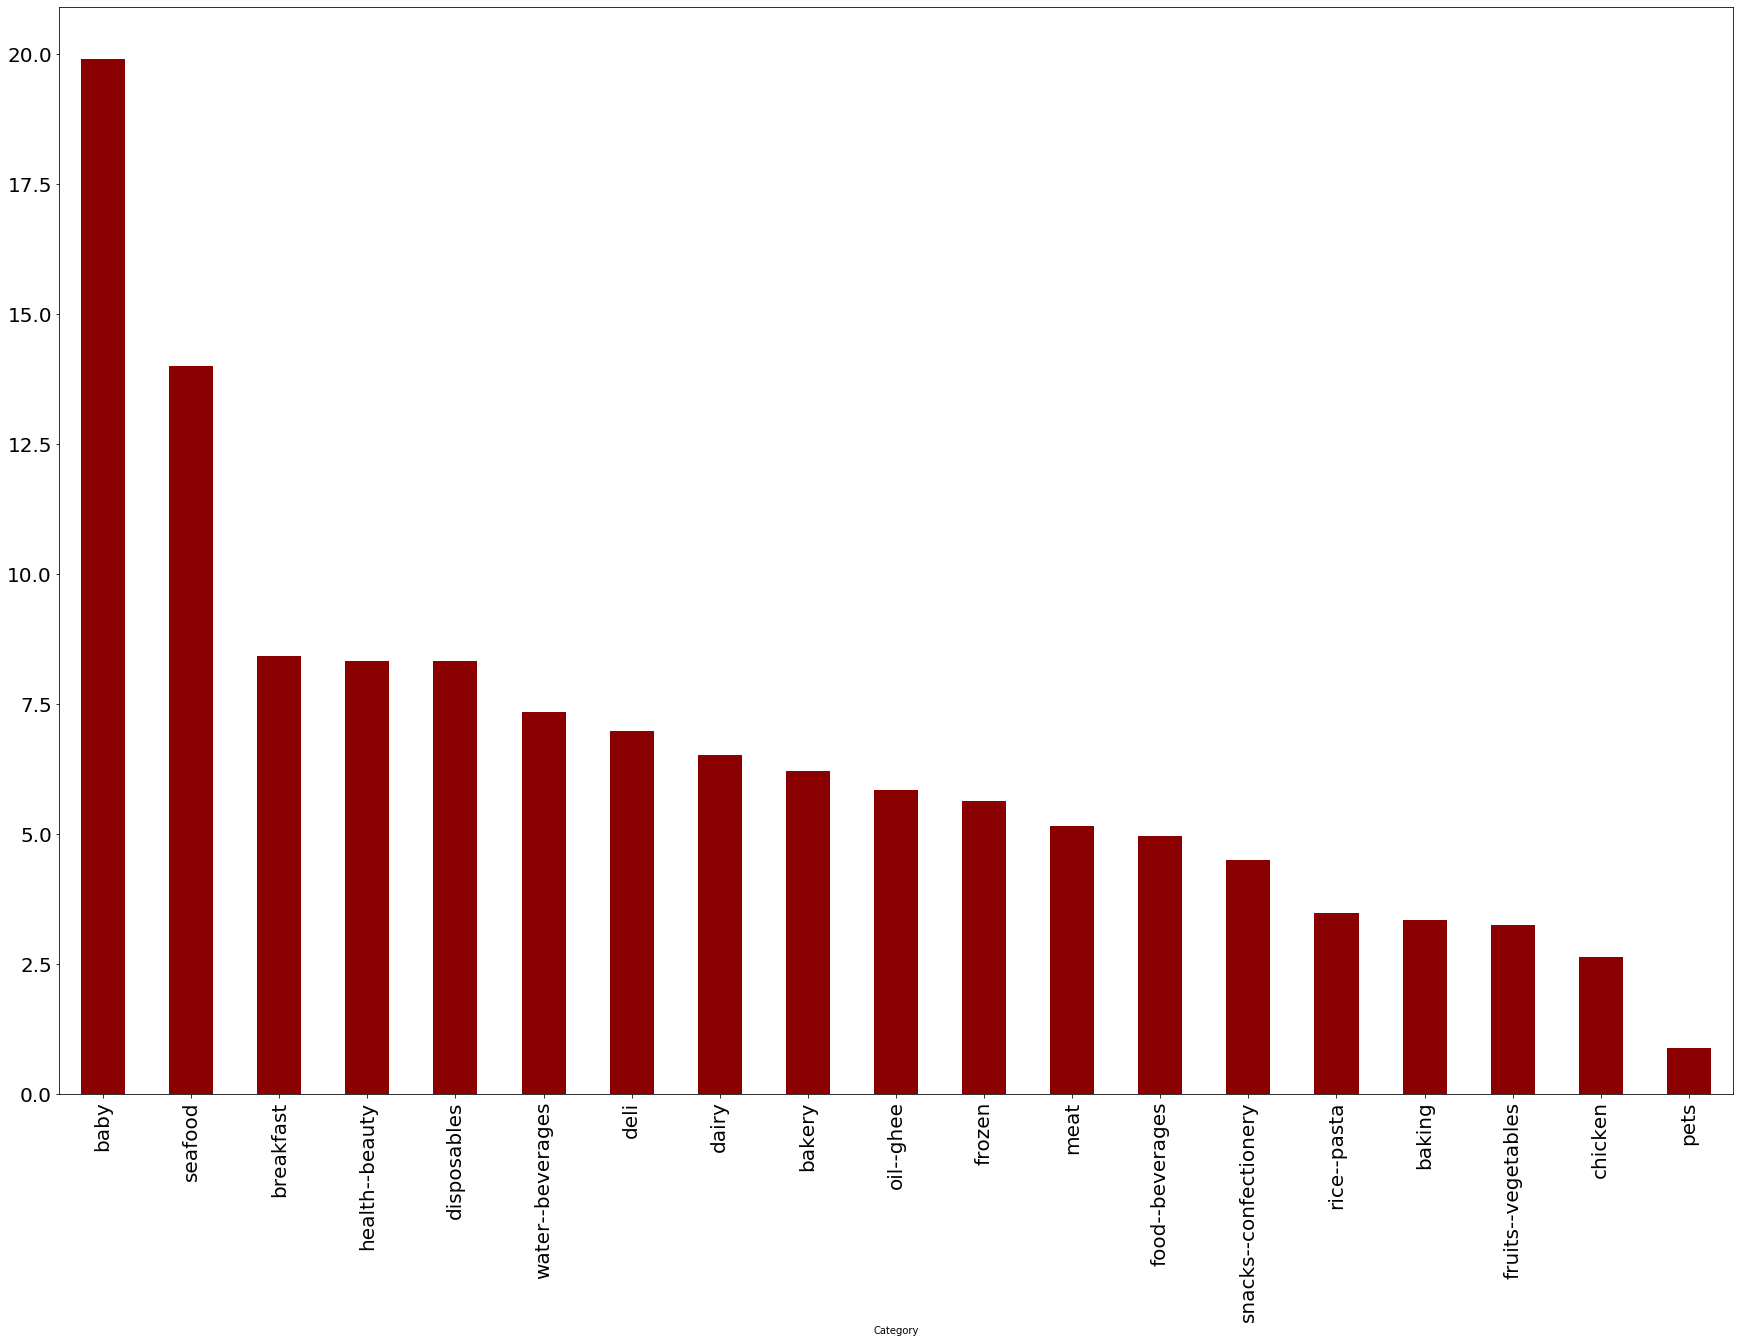

In [25]:
Category_Offer1 =df_offers.groupby(df_offers['Category'])['Different'].mean().sort_values(ascending=False)
Category_Offer1.plot(kind='bar', figsize=(30,20),color='darkred',fontsize=20)

### baby category has the best offers with mean 20.00 riyal discounts 
### then seafood has the second best offers with mean 14.00 riyal discounts 

## both baby & seafood are the most expensive categories, so we can say 
## the most expensive categories have the best offers

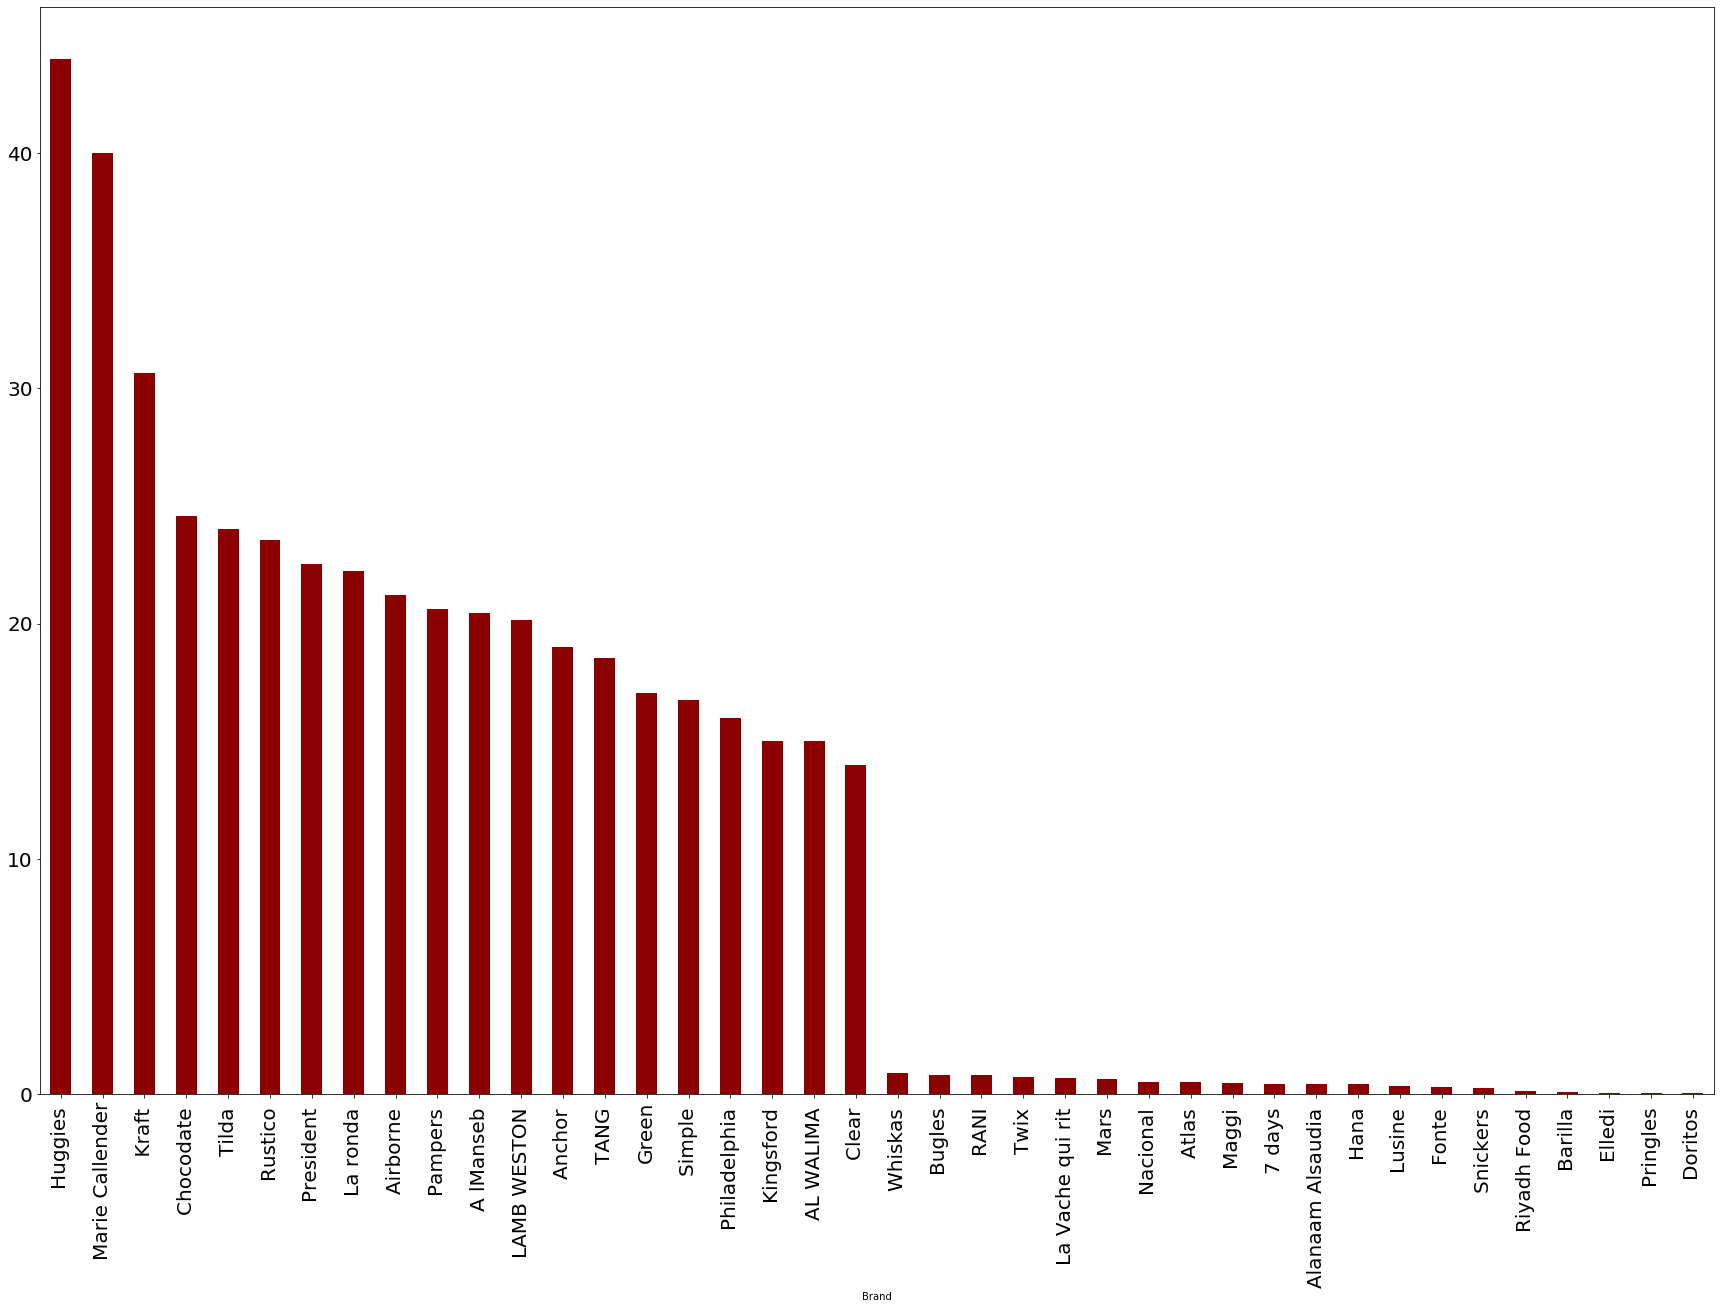

In [26]:
brand_Offer1 =df_offers.groupby(df_offers['Brand'])['Different'].mean().sort_values(ascending=False)
new_brand_Offer1 = brand_Offer1.head(20)
new_brand_Offer1 = new_brand_Offer1.append(brand_Offer1.tail(20))
new_brand_Offer1.plot(kind='bar', figsize=(30,20),color='darkred',fontsize=20)

In [27]:
new_brand_Offer1.describe()

count    40.000000
mean     11.352027
std      12.341883
min       0.050000
25%       0.450000
50%       7.443750
75%      20.493750
max      44.000000
Name: Different, dtype: float64

### Huggies brand has the best offers with mean 44.00 riyal discounts 
### then Marie Callender brand has the second best offers with mean 40.00 riyal discounts 
### 50% of brands that give offers are give offers under 8.00 riyal discounts
### only 25% of brands that give offers are give offers above 20.riyal discounts

# prediction

In [28]:
list_= list()
for w in data['Offer']:
    if w > 0:
        x=1
    else:
        x=0
    list_.append(x)
    
list_

[1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [29]:
## add new column, this column say if the item has offer or not
data['IsOffer']= list_
data.head(15)

,Category,Name,Price,Brand,Offer,Deferent,IsOffer
0,breakfast,Chunky Peanut Butter,9.95,Goody,14.95,5.00,1
1,breakfast,Corn Flakes,9.50,Kellogg,15.95,6.45,1
2,breakfast,Creamy Peanut Butter,9.95,Goody,14.95,5.00,1
3,breakfast,The Original Corn Flakes,9.70,Kellogg,0.00,0.00,0
4,breakfast,Special K Original Wheat Cereal,22.55,Kellogg,0.00,0.00,0
5,breakfast,Bee Honey,38.85,Langnese,0.00,0.00,0
6,breakfast,Country Corn Flakes Breakfast Cereal,11.95,Nestlé,0.00,0.00,0
7,breakfast,Fitness Original Breakfast Cereal,14.50,Nestlé,19.95,5.45,1
8,breakfast,Fitness Honey & Almond Breakfast Cereal,14.50,Nestlé,21.95,7.45,1
9,breakfast,Hazelnut Spread With Cocoa,12.25,Nutella,0.00,0.00,0


In [30]:
from sklearn.preprocessing import LabelEncoder
#transform data 

cat = LabelEncoder().fit_transform(data['Category'].astype('str'))
bran = LabelEncoder().fit_transform(data['Brand'].astype('str'))

In [31]:
data['Category']= cat
data['Brand']= bran
data.head(10)

,Category,Name,Price,Brand,Offer,Deferent,IsOffer
0,3,Chunky Peanut Butter,9.95,396,14.95,5.00,1
1,3,Corn Flakes,9.50,483,15.95,6.45,1
2,3,Creamy Peanut Butter,9.95,396,14.95,5.00,1
3,3,The Original Corn Flakes,9.70,483,0.00,0.00,0
4,3,Special K Original Wheat Cereal,22.55,483,0.00,0.00,0
5,3,Bee Honey,38.85,525,0.00,0.00,0
6,3,Country Corn Flakes Breakfast Cereal,11.95,627,0.00,0.00,0
7,3,Fitness Original Breakfast Cereal,14.50,627,19.95,5.45,1
8,3,Fitness Honey & Almond Breakfast Cereal,14.50,627,21.95,7.45,1
9,3,Hazelnut Spread With Cocoa,12.25,642,0.00,0.00,0


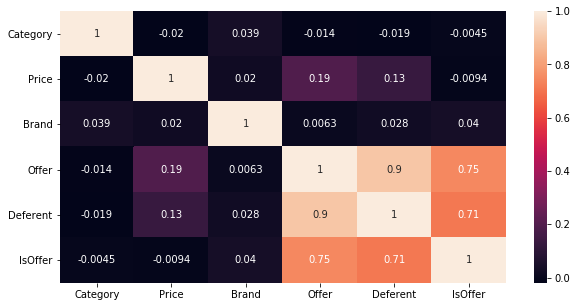

In [32]:
# correlation 
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [34]:
#predict is offer
Class = data['IsOffer']
Class2= data['Category']
#predict category
col = ['Category','Price','Brand']
col2=['Price','Brand','Offer']

# predict offers

In [35]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(data[col],Class, test_size = 0.2, random_state = 10) #80/20 training and test set split. random state Controls the shuffling applied to the data before applying the split. 



In [36]:
## predict if there is offer 

prediction = dict()
lr1 = LogisticRegression().fit(xtrain1,ytrain1)
prediction["LR1"] = lr1.predict(xtest1)

In [37]:
svm1 = LinearSVC().fit(xtrain1,ytrain1)
prediction["svm1"] = svm1.predict(xtest1)




C:\Users\shrougalbahoth\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:
nb1 = GaussianNB().fit(xtrain1,ytrain1)
prediction["nb1"] = nb1.predict(xtest1)

In [39]:
print(' The confusion matrix of predicting is the item has offer by LR')
print(classification_report(ytest1,prediction["LR1"]))

print(' The confusion matrix of predicting is the item has offer by SVM')
print(classification_report(ytest1,prediction["svm1"]))
print(' The confusion matrix of predicting is the item has offer by NB')
print(classification_report(ytest1,prediction["nb1"]))

 The confusion matrix of predicting is the item has offer by LR
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      3652
           1       0.00      0.00      0.00       588

    accuracy                           0.86      4240
   macro avg       0.43      0.50      0.46      4240
weighted avg       0.74      0.86      0.80      4240

 The confusion matrix of predicting is the item has offer by SVM
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      3652
           1       0.50      0.00      0.00       588

    accuracy                           0.86      4240
   macro avg       0.68      0.50      0.46      4240
weighted avg       0.81      0.86      0.80      4240

 The confusion matrix of predicting is the item has offer by NB
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      3652
           1       0.00      0.00      0.00 

C:\Users\shrougalbahoth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# predict category

In [40]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(data[col2],Class2, test_size = 0.2, random_state = 10) #80/20 training and test set split. random state Controls the shuffling applied to the data before applying the split. 



In [41]:
lr2 = LogisticRegression().fit(xtrain2,ytrain2)
prediction["LR2"] = lr2.predict(xtest2)

C:\Users\shrougalbahoth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
svm2 = LinearSVC().fit(xtrain2,ytrain2)
prediction["svm2"] = svm2.predict(xtest2)

C:\Users\shrougalbahoth\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [43]:
nb2 = GaussianNB().fit(xtrain2,ytrain2)
prediction["nb2"] = nb2.predict(xtest2)

In [44]:
print(' The confusion matrix of predicting the category by LR')
print(classification_report(ytest2,prediction["LR2"]))

print(' The confusion matrix of predicting the category by SVM')
print(classification_report(ytest2,prediction["svm2"]))
print(' The confusion matrix of predicting the category by NB')
print(classification_report(ytest2,prediction["nb2"]))

 The confusion matrix of predicting the category by LR
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        76
           3       0.00      0.00      0.00       105
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        59
           8       0.00      0.00      0.00         6
           9       0.66      0.98      0.79      2778
          10       0.00      0.00      0.00       139
          11       0.00      0.00      0.00        15
          12       0.08      0.02      0.03       422
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        14
          15       0.00      0.00      0.00        15
          16       0.00   

C:\Users\shrougalbahoth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# predict category using "Name" 

In [45]:
data.head()

,Category,Name,Price,Brand,Offer,Deferent,IsOffer
0,3,Chunky Peanut Butter,9.95,396,14.95,5.00,1
1,3,Corn Flakes,9.50,483,15.95,6.45,1
2,3,Creamy Peanut Butter,9.95,396,14.95,5.00,1
3,3,The Original Corn Flakes,9.70,483,0.00,0.00,0
4,3,Special K Original Wheat Cereal,22.55,483,0.00,0.00,0


In [46]:
data["Name"] = data["Name"].str.lower()

In [47]:
exclude = set(string.punctuation+ '1234567890?_-.,:;') #string.punctuation will give all sets of punctuation.

In [48]:
def cleaningALL(text):
    x = ""
    text=text.split()
    for txt in text:
        txt= ''.join(ch for ch in txt if ch not in exclude) #Join all items in a tuple into a string
        x=x + txt+ " "
    return x  

In [49]:
data["Name"]=data["Name"].apply(lambda x: cleaningALL(x))
data.head()

,Category,Name,Price,Brand,Offer,Deferent,IsOffer
0,3,chunky peanut butter,9.95,396,14.95,5.00,1
1,3,corn flakes,9.50,483,15.95,6.45,1
2,3,creamy peanut butter,9.95,396,14.95,5.00,1
3,3,the original corn flakes,9.70,483,0.00,0.00,0
4,3,special k original wheat cereal,22.55,483,0.00,0.00,0


In [50]:
vect = TfidfVectorizer()

X_train,X_test,Y_train,Y_test = train_test_split(data['Name'],data["Category"], test_size = 0.2, random_state = 10) #80/20 training and test set split. random state Controls the shuffling applied to the data before applying the split. 
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)
type(X_train_df)

scipy.sparse.csr.csr_matrix

# **Predict the Category by the Item Name Using Logistic Regression and Tf-idf**


In [51]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train_df,Y_train)

C:\Users\shrougalbahoth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [52]:
prediction = dict()

prediction["Logistic"] = LRmodel.predict(X_test_df)
print ("Accuracy:",accuracy_score(Y_test,prediction["Logistic"]))

Accuracy: 0.8252358490566037


In [53]:
print(classification_report(Y_test,prediction["Logistic"]))

              precision    recall  f1-score   support

           0       0.98      0.60      0.75        88
           1       1.00      0.05      0.09        21
           2       0.94      0.21      0.34        76
           3       0.80      0.19      0.31       105
           4       0.73      0.73      0.73        15
           5       0.85      0.75      0.80        68
           6       0.00      0.00      0.00         7
           7       1.00      0.88      0.94        59
           8       0.00      0.00      0.00         6
           9       0.81      0.99      0.89      2778
          10       0.70      0.29      0.41       139
          11       0.00      0.00      0.00        15
          12       0.94      0.94      0.94       422
          13       1.00      0.20      0.33         5
          14       0.00      0.00      0.00        14
          15       1.00      0.67      0.80        15
          16       0.72      0.34      0.46        38
          17       1.00    

C:\Users\shrougalbahoth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Predict the Category by the Item Name Using SVM and Tf-idf**

In [54]:
svm = LinearSVC().fit(X_train_df,Y_train)
prediction["SVM"] = svm.predict(X_test_df)

accuracy_score(Y_test,prediction["SVM"])

0.8658018867924528

In [55]:
print(classification_report(Y_test,prediction["SVM"]))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        88
           1       0.83      0.48      0.61        21
           2       0.87      0.36      0.50        76
           3       0.76      0.35      0.48       105
           4       0.61      0.73      0.67        15
           5       0.88      0.85      0.87        68
           6       0.17      0.14      0.15         7
           7       0.94      0.98      0.96        59
           8       1.00      0.67      0.80         6
           9       0.86      0.99      0.92      2778
          10       0.73      0.43      0.54       139
          11       1.00      0.20      0.33        15
          12       0.95      0.98      0.97       422
          13       0.67      0.80      0.73         5
          14       1.00      0.07      0.13        14
          15       1.00      0.87      0.93        15
          16       0.79      0.39      0.53        38
          17       0.82    

# **Predict the Category by the Item Name Using NB and Tf-idf**

In [56]:
from sklearn.naive_bayes import MultinomialNB
NBmodel = MultinomialNB().fit(X_train_df,Y_train)
prediction["Naive"] = NBmodel.predict(X_test_df)
accuracy_score(Y_test,prediction["Naive"])


0.785377358490566

In [57]:
print(classification_report(Y_test,prediction["Naive"]))

              precision    recall  f1-score   support

           0       1.00      0.32      0.48        88
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        76
           3       1.00      0.04      0.07       105
           4       0.00      0.00      0.00        15
           5       0.97      0.44      0.61        68
           6       0.00      0.00      0.00         7
           7       1.00      0.54      0.70        59
           8       0.00      0.00      0.00         6
           9       0.77      1.00      0.87      2778
          10       0.48      0.11      0.18       139
          11       0.00      0.00      0.00        15
          12       0.87      0.95      0.91       422
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        14
          15       1.00      0.40      0.57        15
          16       1.00      0.16      0.27        38
          17       0.00    

C:\Users\shrougalbahoth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
